In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

d_train = np.load('MNIST_training_set.npy', allow_pickle=True)
d_test = np.load('MNIST_test_set.npy', allow_pickle=True)

X_train = d_train.item().get('features')
Y_train = d_train.item().get('labels')
X_test = d_test.item().get('features')
Y_test = d_test.item().get('labels')

In [2]:
def plot_digits(XX, N, title):
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    for i in range(N):
        for j in range(N):
            pos = ax[i,j].imshow(XX[(N)*i+j,:].reshape((16, 16)), cmap="Greys")
            pos = ax[i,j].axis("off")
    fig.suptitle(title, fontsize=24)

def fcutoff(cutoff,singularvals):
    fnormapprox = 0
    fnorm = np.sqrt(np.sum(singularvals ** 2))
    count = 1
    while fnormapprox < cutoff:
        fnormapprox = np.sqrt(np.sum(singularvals[:count]**2))/fnorm
        count += 1
    return [count-1, fnormapprox]

def digitextractor(X_data,Y_data,digit1,digit2):
    Xdigit12 = np.zeros((X_data.shape[0],256))
    Ydigit12 = np.zeros((Y_data.shape[0]))
    btrain12 = np.zeros((Y_data.shape[0]))
    count = 0
    for n in range(int(len(Y_data))):
        if Y_data[n] == digit1:
            Xdigit12[count,:] = X_data[n,:]
            Ydigit12[count] = digit1
            btrain12[count] = -1
            count += 1
        elif Y_data[n] == digit2:
            Xdigit12[count,:] = X_data[n,:]
            Ydigit12[count] = digit2
            btrain12[count] = 1
            count += 1
    Ydigit12 = Ydigit12[:count]
    Xdigit12 = Xdigit12[0:count,:]
    btrain12 = btrain12[0:count]
    return Xdigit12, Ydigit12, btrain12

In [5]:
###### Extracting Digits ##########

Xtrain18, Ytrain18, btrain18 = digitextractor(X_train, Y_train, 1, 8)
Xtest18, Ytest18, btest18 = digitextractor(X_test, Y_test, 1, 8)

Xtrain38, Ytrain38, btrain38 = digitextractor(X_train, Y_train, 3, 8)
Xtest38, Ytest38, btest38 = digitextractor(X_test, Y_test, 3, 8)

Xtrain27, Ytrain27, btrain27 = digitextractor(X_train, Y_train, 2, 7)
Xtest27, Ytest27, btest27 = digitextractor(X_test, Y_test, 2, 7)

##########  PCA  ############
pcaall = PCA()
PCA_train_all = pcaall.fit(X_train.copy())
PCA_train_singular = pcaall.singular_values_

pca = PCA(16)
PCA_train = pca.fit(X_train.copy())
PCA_train_modes = pca.components_
ridge = Ridge(alpha = 1)

##########   Classifier Generation for (1,8)  ############

PCA_A_Train18 =  np.insert(Xtrain18 @ PCA_train_modes.T, 0, 1,axis=1)
PCA_A_Test18 =  np.insert(Xtest18 @ PCA_train_modes.T, 0, 1,axis=1)

ridge.fit(PCA_A_Train18, btrain18)
predtrain18 = ridge.predict(PCA_A_Train18)
train18mse = mean_squared_error(btrain18, predtrain18)
print('The (1,8) Training MSE is:', train18mse)

predtest18 = PCA_A_Test18 @ beta18
test18mse = mean_squared_error(btest18, predtest18)
print('The (1,8) Testing MSE is:',test18mse)

##########    Classifier Generation for (3,8)    ##############

PCA_A_Train38 =  np.insert(Xtrain38 @ PCA_train_modes.T, 0, 1,axis=1)
PCA_A_Test38 =  np.insert(Xtest38 @ PCA_train_modes.T, 0, 1,axis=1)

ridge.fit(PCA_A_Train38, btrain38)
predtrain38 = ridge.predict(PCA_A_Train38)
train38mse = mean_squared_error(btrain38, predtrain38)
print('The (3,8) Training MSE is:', train38mse)

predtest38 = PCA_A_Test38 @ beta38
test38mse = mean_squared_error(btest38, predtest38)
print('The (3,8) Testing MSE is:', test38mse)

##########    Classifier Generation for (2,7)    ##############

PCA_A_Train27 =  np.insert(Xtrain27 @ PCA_train_modes.T, 0, 1,axis=1)
PCA_A_Test27 =  np.insert(Xtest27 @ PCA_train_modes.T, 0, 1,axis=1)

ridge.fit(PCA_A_Train27, btrain27)
beta27 = ridge.coef_.reshape(-1,1)
beta27[0] = ridge.intercept_

predtrain27 = PCA_A_Train27 @ beta27
train27mse = mean_squared_error(btrain27, predtrain27)
print('The (2,7) Training MSE is:', train27mse)

predtest27 = PCA_A_Test27 @ beta27
test27mse = mean_squared_error(btest27, predtest27)
print('The (2,7) Testing MSE is:', test27mse)

#############      Results     #############

The (1,8) Training MSE is: 0.07461118858584229
The (1,8) Testing MSE is: 0.08328701600289438
The (3,8) Training MSE is: 0.18040398900780122
The (3,8) Testing MSE is: 0.2581657866876275
The (2,7) Training MSE is: 0.0917927896109364
The (2,7) Testing MSE is: 0.13649505841138226


[3, 0.6665563581513277] [7, 0.8126575247169981] [14, 0.9052289842891693]


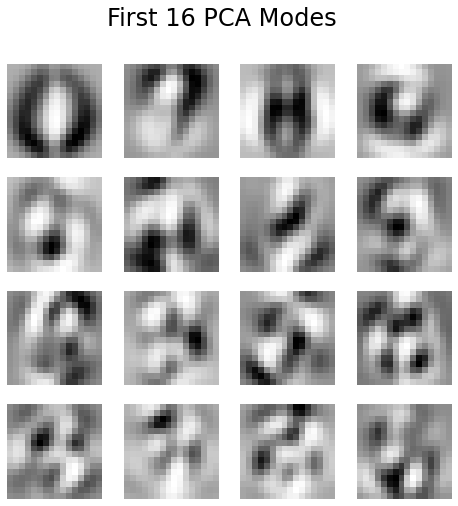

In [36]:
f60svd = fcutoff(0.6, PCA_train_singular)
f80svd = fcutoff(0.8, PCA_train_singular)
f90svd = fcutoff(0.9, PCA_train_singular)
print(f60svd, f80svd, f90svd)

plot_digits(PCA_train_modes[:16,:],4,'First 16 PCA Modes')

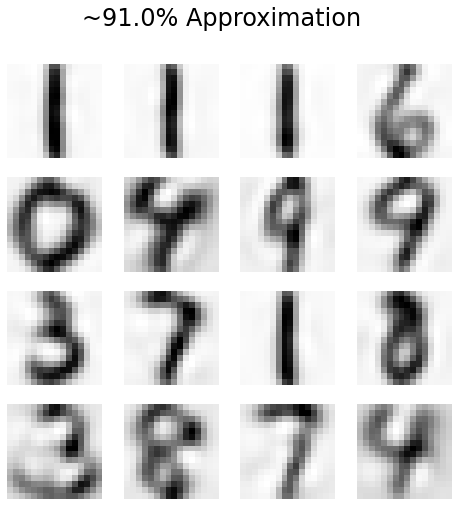

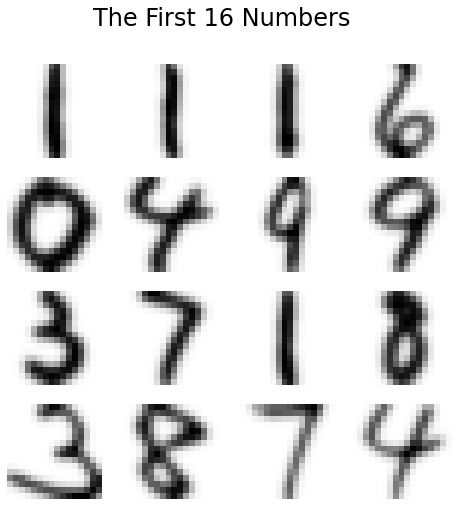

In [37]:
X_train_centered = X_train.copy() - np.mean(X_train, axis = 0)
xtrainU, xtrainS, xtrainVT = np.linalg.svd(X_train_centered)
xtrainSproper = np.append(np.diag(xtrainS),np.zeros((2000-256,256)), axis = 0)

X_test_centered = X_test.copy() - np.mean(X_test, axis = 0)
xtestU, xtestS, xtestVT = np.linalg.svd(X_test_centered)
xtestSproper = np.append(np.diag(xtestS),np.zeros((2000-256,256)), axis = 0)

xtrainS_approx = xtrainS.copy()
xtrainS_approx[24:None] = 0
xtrainSproper_approx = np.append(np.diag(xtrainS_approx),np.zeros((2000-256,256)), axis = 0)
X_approx = np.mean(X_train, axis=0) + np.dot( xtrainU, (np.dot(xtrainSproper_approx, xtrainVT )))

plot_digits(X_approx,4,'~{}% Approximation'.format(np.round(100*f90svd[1])))
plot_digits(X_train,4,'The First 16 Numbers')